In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\ATN-PC\Desktop\Rpaperdata.csv")

In [3]:
df.sample(5)

,ground,red,yellow,blue,Ir,Iy,Ib,Vr,Vy,Vb,"g,r,y,b_state",line_state,target
2915,0,1,1,0,11.267523,-753.243674,744.414447,-0.273572,-0.007010,0.280581,"0,1,1,0",unhealthy,1
4099,0,1,1,1,433.607921,-455.246627,23.779614,0.033423,-0.521372,0.487948,"0,1,1,1",unhealthy,1
4166,0,1,1,1,555.610761,-872.407817,318.869454,-0.016876,-0.025193,0.042069,"0,1,1,1",unhealthy,1
5478,1,0,0,1,838.227513,35.664442,16.681104,0.057487,-0.370756,0.313269,"1,0,0,1",unhealthy,1
1737,0,0,0,0,35.974699,-29.388124,-9.647765,0.502448,0.037263,-0.539711,"0,0,0,0",healthy,0


In [4]:
df.target.value_counts()

target
1    5496
0    2365
Name: count, dtype: int64

In [5]:
# X3=df[df.target==1].sample(2365)
# X4=df[df.target==0].sample(2365)

In [6]:
# df1=pd.concat([X3,X4],axis=0)

In [7]:
# df1.target.value_counts().sum

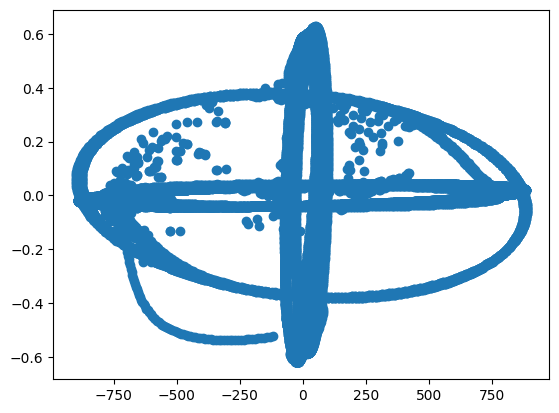

In [8]:
plt.scatter(df.iloc[:,4:6],df.iloc[:,7:9])

In [9]:
df.columns

Index(['ground', 'red', 'yellow', 'blue', 'Ir', 'Iy', 'Ib', 'Vr', 'Vy', 'Vb',
       'g,r,y,b_state', 'line_state', 'target'],
      dtype='object')

In [10]:
X=df[['ground', 'red', 'yellow', 'blue', 'Ir', 'Iy', 'Ib', 'Vr', 'Vy', 'Vb']]
y=df['target']


In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
#contamination =y.mean()

In [13]:
contaminations=0.5

In [14]:
clf= IsolationForest(n_estimators=100,contamination=contaminations)
clf.fit(X)

IsolationForest(contamination=0.5)

In [15]:
df["Anomalies"]=clf.predict(X)

In [16]:
df.sample(7)

,ground,red,yellow,blue,Ir,Iy,Ib,Vr,Vy,Vb,"g,r,y,b_state",line_state,target,Anomalies
3513,0,1,1,1,-761.408474,768.764281,-5.327349,0.002014,0.035650,-0.037664,"0,1,1,1",unhealthy,1,-1
2137,0,0,0,0,52.419307,-10.526782,-45.187566,0.267495,0.344469,-0.611964,"0,0,0,0",healthy,0,1
6556,1,0,1,1,786.418178,-747.253286,-12.494244,0.001601,-0.162159,0.160557,"1,0,1,1",unhealthy,1,-1
207,0,0,0,0,-69.527452,81.777873,-15.610053,-0.312308,-0.286908,0.599216,"0,0,0,0",healthy,0,1
1095,0,0,0,0,-14.197756,-15.984351,26.730116,0.565251,-0.420785,-0.144466,"0,0,0,0",healthy,0,1
4667,1,0,0,1,-697.272549,-70.536233,28.911233,0.276573,-0.178907,-0.097666,"1,0,0,1",unhealthy,1,-1
6705,1,0,1,1,870.166002,-414.806108,16.235499,0.021522,-0.305686,0.284164,"1,0,1,1",unhealthy,1,1


In [17]:
df["Anomalies_pred"]=df["Anomalies"].apply(lambda x:0 if x==1 else 1 )

In [18]:
df.sample(5)

,ground,red,yellow,blue,Ir,Iy,Ib,Vr,Vy,Vb,"g,r,y,b_state",line_state,target,Anomalies,Anomalies_pred
7808,1,1,1,1,871.524216,-507.729520,-35.849679,0.016758,-0.243314,0.226556,"1,1,1,1",unhealthy,1,-1,1
1909,0,0,0,0,44.738472,35.258929,-82.918060,-0.237610,0.617897,-0.380287,"0,0,0,0",healthy,0,1,0
2225,0,0,0,0,54.062377,-0.873754,-56.609066,0.170517,0.428452,-0.598970,"0,0,0,0",healthy,0,-1,1
2088,0,0,0,0,51.210030,-17.061928,-37.201066,0.317767,0.293344,-0.611111,"0,0,0,0",healthy,0,1,0
2633,0,1,1,0,-42.217119,-336.409078,381.064536,-0.504520,-0.036891,0.541411,"0,1,1,0",unhealthy,1,-1,1


In [19]:
f1_score_result=f1_score(df["target"],df["Anomalies_pred"])

Checking the performance of our model through the us of f1_score_result_ 

In [20]:
f1_score_result

0.7305325694886484

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initializing the model
rf_model = RandomForestClassifier(random_state=42)

# Training the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
# Using the best parameters found from RandomizedSearchCV
rf_tuned = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    min_samples_split=8,
    min_samples_leaf=9,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)


rf_tuned.fit(X_train, y_train)


y_pred_tuned_rf = rf_tuned.predict(X_test)


accuracy_rf_tuned = accuracy_score(y_test, y_pred_tuned_rf)
print("Tuned Random Forest Accuracy:", accuracy_rf_tuned)


Tuned Random Forest Accuracy: 1.0


In [25]:
rf_tuned.fit(X, y)

RandomForestClassifier(max_depth=7, min_samples_leaf=9, min_samples_split=8,
                       random_state=42)

In [26]:
# Initializing the Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)


log_model.fit(X, y)

test_predict = log_model.predict(X_test)



accuracy_lg_tuned = accuracy_score(y_test, test_predict)
print("Tuned Random Forest Accuracy:", accuracy_lg_tuned)

Tuned Random Forest Accuracy: 1.0


In [27]:
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X, y)
test_predicts = svm_model.predict(X_test)



accuracy_rf_tuned = accuracy_score(y_test, test_predicts)
print("Tuned Random Forest Accuracy:", accuracy_rf_tuned)

Tuned Random Forest Accuracy: 0.9726636999364272


In [29]:


# Stacking the base models with Logistic Regression as the meta-model
stacking_models = StackingClassifier(
    estimators=[
        ('rf', rf_tuned),
        ('xgb', svm_model)
    ],
    final_estimator= log_model,
    passthrough=False  # If True, features will be concatenated with predictions
)

# Train the stacked model
stacking_models.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacking_models.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stack)
print(f"Accuracy: {stacking_accuracy}")

Accuracy: 1.0


In [31]:
import pickle

In [32]:
with open("Reseach_project_model.pkl","wb") as model_file:
    pickle.dump(stacking_models,model_file)

In [31]:
with open("Ml_project_model.pkl","rb") as model_file:
    loaded_model = pickle.load(model_file)